<a href="https://colab.research.google.com/github/mcatrinque/mlp_digit_recognition/blob/main/mlp_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconhecimento de Dígitos Manuscritos usando Redes Neurais MLP



## Enunciado
- Redes Neuronais + Backpropagation

Neste trabalho você irá implementar uma rede neuronal com três camadas:

1. Camada de entrada: cada unidade representa uma dimensão do dado de entrada.

2. Camada oculta: cada unidade representa uma transformação a partir das unidades de entrada.

3. Camada de saída: cada unidade representa a chance da saída correspondente ser a correta.

Você irá utilizar a função Sigmóide para obter não-linearidade. Além disso, a função de perda a ser minimizada é a seguinte:

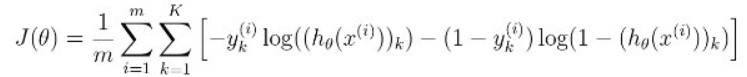

onde m é a quantidade de entradas no treino, K é o número de saídas possíveis,  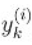 representa a saída correta de cada classe k em cada entrada (i), e 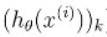 similarmente representa a saída dada pela rede neuronal.

O dado a ser utilizado está anexado. Trata-se de 5000 entradas, onde cada entrada refere-se a um dígito escrito manualmente (i.e., MNIST dataset). Dessa forma, m=5000 e K=10. Cada entrada é dada por uma matriz de dimensões 28 por 28, ou seja, um vetor de 784 dimensões. A primeira coluna do arquivo sempre é o rótulo do dígito correto.

A rede neuronal a ser implementada deverá ter 784 unidades de entrada e 10 unidades de saída. Em seus experimentos, você deverá variar o número de unidades na camada oculta (25, 50, 100).

Além disso, você deverá comparar os seguintes algoritmos de cálculo de gradiente:

1. Gradient Descent: o gradiente é calculado após cada época (após as 5000 entradas serem processadas).

2. Stochastic Gradient Descent: o gradiente é calculado após cada entrada.

3. Mini-Batch: o gradiente é calculado após um certo número de entradas (considere 10 e 50).

Por fim, você também deverá variar a taxa de aprendizado: 0.5, 1, 10.

O documento a ser entregue deverá apresentar o resultado de seus experimentos. Ou seja, deverá apresentar discussão da variação do número de unidades na camada oculta para cada um dos três algoritmos de cálculo de gradiente. Você deverá apresentar gráficos mostrando a convergência do erro empírico para cada situação (unidades na camada oculta, algoritmo de cálculo do gradiente, taxa de aprendizado). Você deverá deixar claras todas as hipóteses que julgar serem pertinentes

## Exploração da Base de Dados

### Importação dos dados:

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#https://drive.google.com/file/d/16ZxRS09rSso39Bc8TUgaD-6dW6pmusHd/view?usp=drive_link
!gdown --id "16ZxRS09rSso39Bc8TUgaD-6dW6pmusHd"
mnist = pd.read_csv('data_tp1')

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=16ZxRS09rSso39Bc8TUgaD-6dW6pmusHd
To: /content/data_tp1
100% 9.06M/9.06M [00:00<00:00, 232MB/s]


### Verificação inicial dos dados

Informações sobre a quantidade de entradas, features e o formato dos dados presentes no Dataset:

In [ ]:
mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Columns: 785 entries, 7 to 0.667
dtypes: int64(785)
memory usage: 29.9 MB


Visualização do Dataset:

In [ ]:
mnist.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Estatísticas básicas sobre o conjunto de dados disponível:

In [ ]:
mnist.describe()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
count,4999.000000,4999.0,4999.0,4999.0,4999.0,4999.0,4999.0,4999.0,4999.0,4999.0,...,4999.000000,4999.000000,4999.000000,4999.000000,4999.0,4999.0,4999.0,4999.0,4999.0,4999.0
mean,4.471294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.242048,0.162432,0.026005,0.001200,0.0,0.0,0.0,0.0,0.0,0.0
std,2.889717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.488780,5.332185,1.024570,0.084861,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,231.000000,52.000000,6.000000,0.0,0.0,0.0,0.0,0.0,0.0


## Preparação e Tratamento dos Dados

### Separação do conjunto de dados entrada e o conjunto de alvos:

In [ ]:
y = mnist.iloc[:,0].values
X = mnist.iloc[:,1:].values

### Normalização dos dados do conjunto X:
Defininido uma variação entre 0 e 1 para os valores da escala de cinza, que está entre 0 e 255:

In [ ]:
X = X / 255

### Visualização dos digitos formados a partir das escalas de cinza:

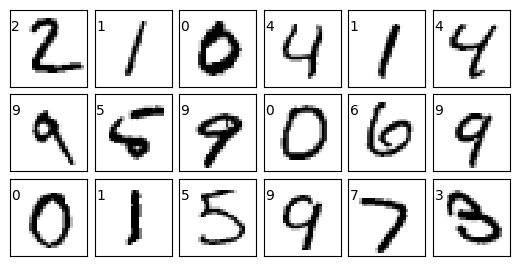

In [ ]:
fig = plt.figure(figsize=(5, 5))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.1, wspace=0.1)

for i in range(18):
  ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
  ax.imshow(X[i].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')
  ax.text(0, 7, str(y[i]))

### Divisão dos dados entre treino e teste:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

### Listando as dimensões dos conjuntos gerados:

In [ ]:
print(f'Conjunto X: {X.shape[0]} x {X.shape[1]}')
print(f'Conjunto Y: {y.shape[0]}')
print(f'Conjunto Treino X: {X_train.shape[0]} x {X_train.shape[1]}')
print(f'Conjunto Treino Y: {y_train.shape[0]}')
print(f'Conjunto Teste X: {X_test.shape[0]} x {X_test.shape[1]}')
print(f'Conjunto Teste Y: {y_test.shape[0]}')

Conjunto X: 4999 x 784
Conjunto Y: 4999
Conjunto Treino X: 3499 x 784
Conjunto Treino Y: 3499
Conjunto Teste X: 1500 x 784
Conjunto Teste Y: 1500


### Visualização da proporção entre as classes alvo de teste e treino:

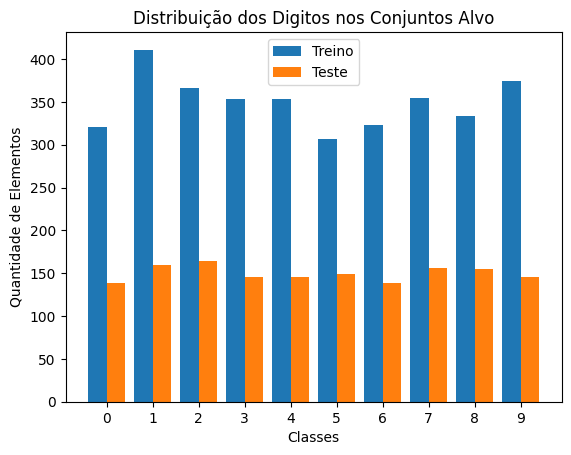

In [ ]:
digits, counts_train = np.unique(y_train, return_counts=True)
digits, counts_test = np.unique(y_test, return_counts=True)

X_axis = np.arange(len(digits))

plt.bar(X_axis - 0.2, counts_train, 0.4, label = 'Treino')
plt.bar(X_axis + 0.2, counts_test, 0.4, label = 'Teste')

plt.xticks(X_axis, digits.astype('int'))
plt.xlabel('Classes')
plt.ylabel("Quantidade de Elementos")
plt.title("Distribuição dos Digitos nos Conjuntos Alvo")
plt.legend()
plt.show()

## Construção e Treino da Rede Neural

In [ ]:
mini_batch = [1, 10, 50, 5000]
hidden_layers = [100, 50, 25]
learning_rate = [10, 1, 0.5]
models = []

### Cálculo de Gradiente:

O número de lotes pode ser utilizado para definir o tipo de cálculo de Gradiente empregado em cada Modelo:
*   **Batch Gradient Descent** - Utiliza todos os exemplos de treinamento para atualização dos parâmetros.
*   **Stochastic Gradient Descent** - Utiliza apenas um exemplo de treinamento de cada vez para atualização dos parâmetros.
*   **Mini Batch Gradient Descent** - Utiliza um número fixo de exemplos de treinamento. Esse número deve ser menor que o total de exemplos presentes conjunto de dados.








In [ ]:
def mlp_model(batch):
  if batch == 1:
    return 'SGD'
  elif batch == 5000:
    return 'GD Batch'
  else:
    return 'Mini Batch'

### Geração de predições:

In [ ]:
for batch in mini_batch:
  for layer in hidden_layers:
    for rate in learning_rate:
      mlp = MLPClassifier(
          hidden_layer_sizes=(layer,),
          activation='logistic', #sigmoid
          alpha=1e-4,
          solver='sgd', #stochastic gradient descent
          batch_size=batch, #mini-batch
          learning_rate='constant',
          max_iter=500,
          early_stopping=True,
          learning_rate_init=rate,
      ).fit(X_train, y_train)
      models.append((mlp_model(batch), batch, layer, rate, mlp.score(X_train, y_train), mlp.score(X_test, y_test), mlp.predict(X_test), mlp))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is go

## Análise dos Resultados Obtidos

### Descrição dos parâmetros utilizados em cada modelo e da acurácia obtida:

In [ ]:
models_df = pd.DataFrame(data = models, columns = ['Model', 'Batch Size', 'Hidden Layers', 'Learning Rate', 'Train Accuracy', 'Test Accuracy', 'Predict', 'MLP'])
models_df = models_df.iloc[: , :-1]
models_df

,Model,Batch Size,Hidden Layers,Learning Rate,Train Accuracy,Test Accuracy,Predict
0,SGD,1,100,10.0,0.092312,0.092667,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ..."
1,SGD,1,100,1.0,0.228637,0.220667,"[7, 1, 1, 7, 7, 7, 1, 1, 7, 0, 7, 1, 1, 7, 1, ..."
2,SGD,1,100,0.5,0.208059,0.190000,"[9, 9, 9, 9, 9, 9, 9, 1, 9, 9, 9, 1, 9, 9, 1, ..."
3,SGD,1,50,10.0,0.095456,0.103333,"[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ..."
4,SGD,1,50,1.0,0.169763,0.170000,"[7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 1, ..."
5,SGD,1,50,0.5,0.182909,0.187333,"[8, 8, 8, 8, 8, 8, 8, 1, 8, 8, 8, 1, 8, 8, 1, ..."
6,SGD,1,25,10.0,0.117462,0.106667,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
7,SGD,1,25,1.0,0.117462,0.106667,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
8,SGD,1,25,0.5,0.158617,0.167333,"[5, 3, 5, 7, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ..."
9,Mini Batch,10,100,10.0,0.117462,0.106667,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


### Visualização das frequências de classificação a partir da matriz de confusão:

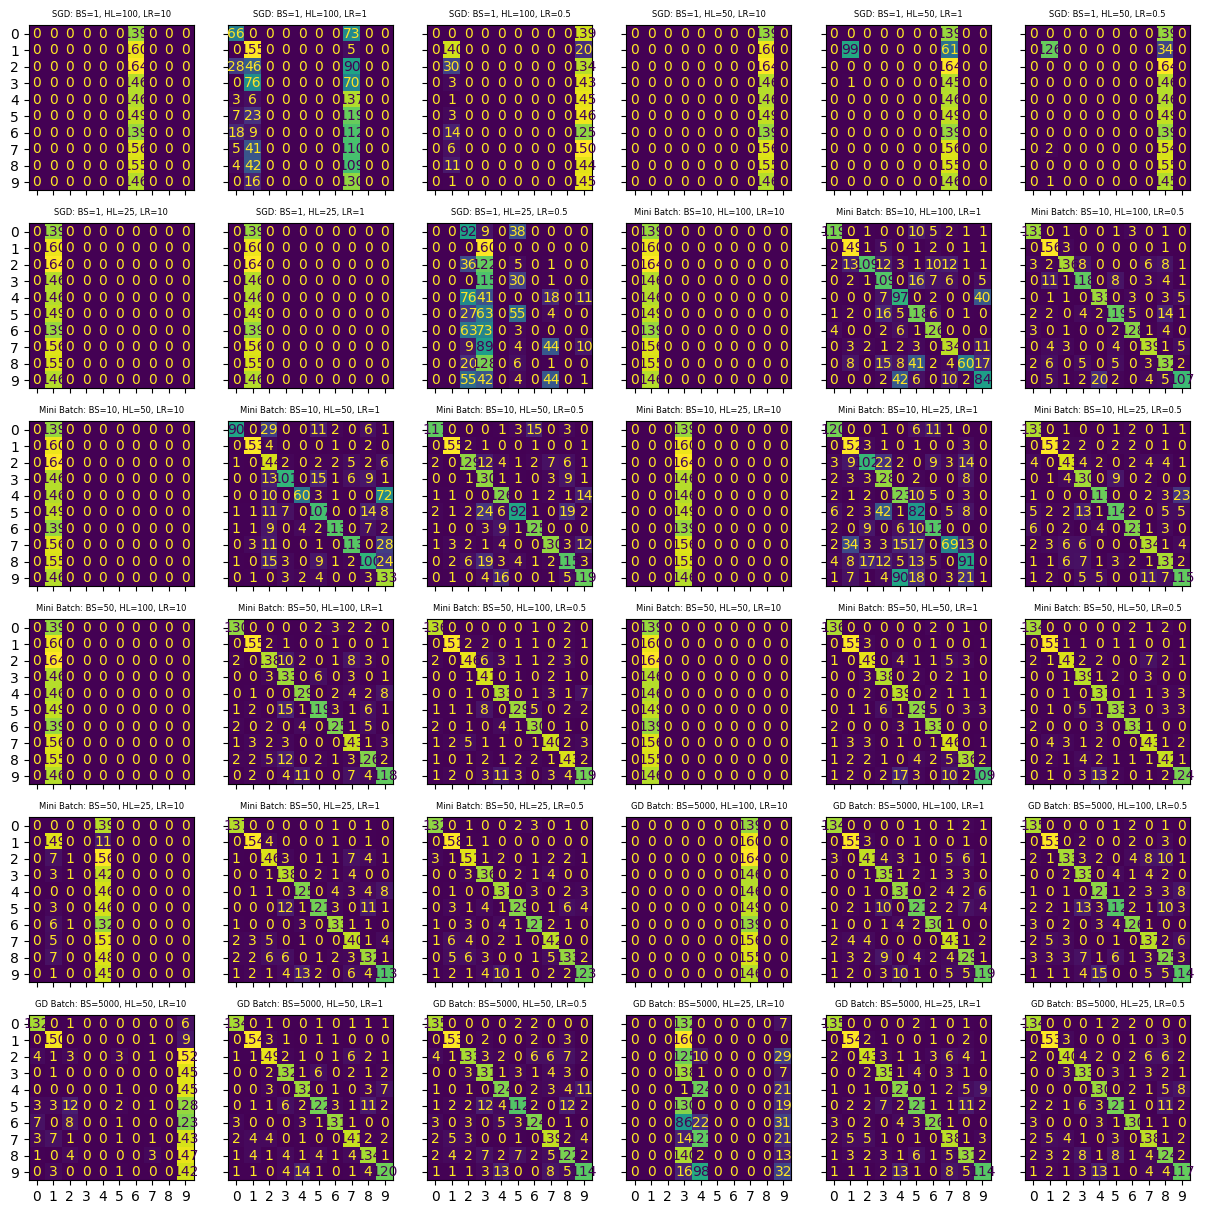

In [ ]:
f, ax = plt.subplots(6, 6, figsize=(15, 15), sharex='col', sharey='row')
n_model = 0
for i in range(6):
  for j in range(6):
    confusion_matrix = metrics.confusion_matrix(y_test, models[n_model][6])
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix)
    disp.plot(ax = ax[i][j])
    disp.ax_.set_title(f'{models[n_model][0]}: BS={models[n_model][1]}, HL={models[n_model][2]}, LR={models[n_model][3]}', fontsize=6)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    disp.ax_.set_ylabel('')
    n_model = n_model + 1
#f.colorbar(disp.im_, ax=ax)

### Avaliação dos modelos a partir das curvas de aprendizado e de perda:

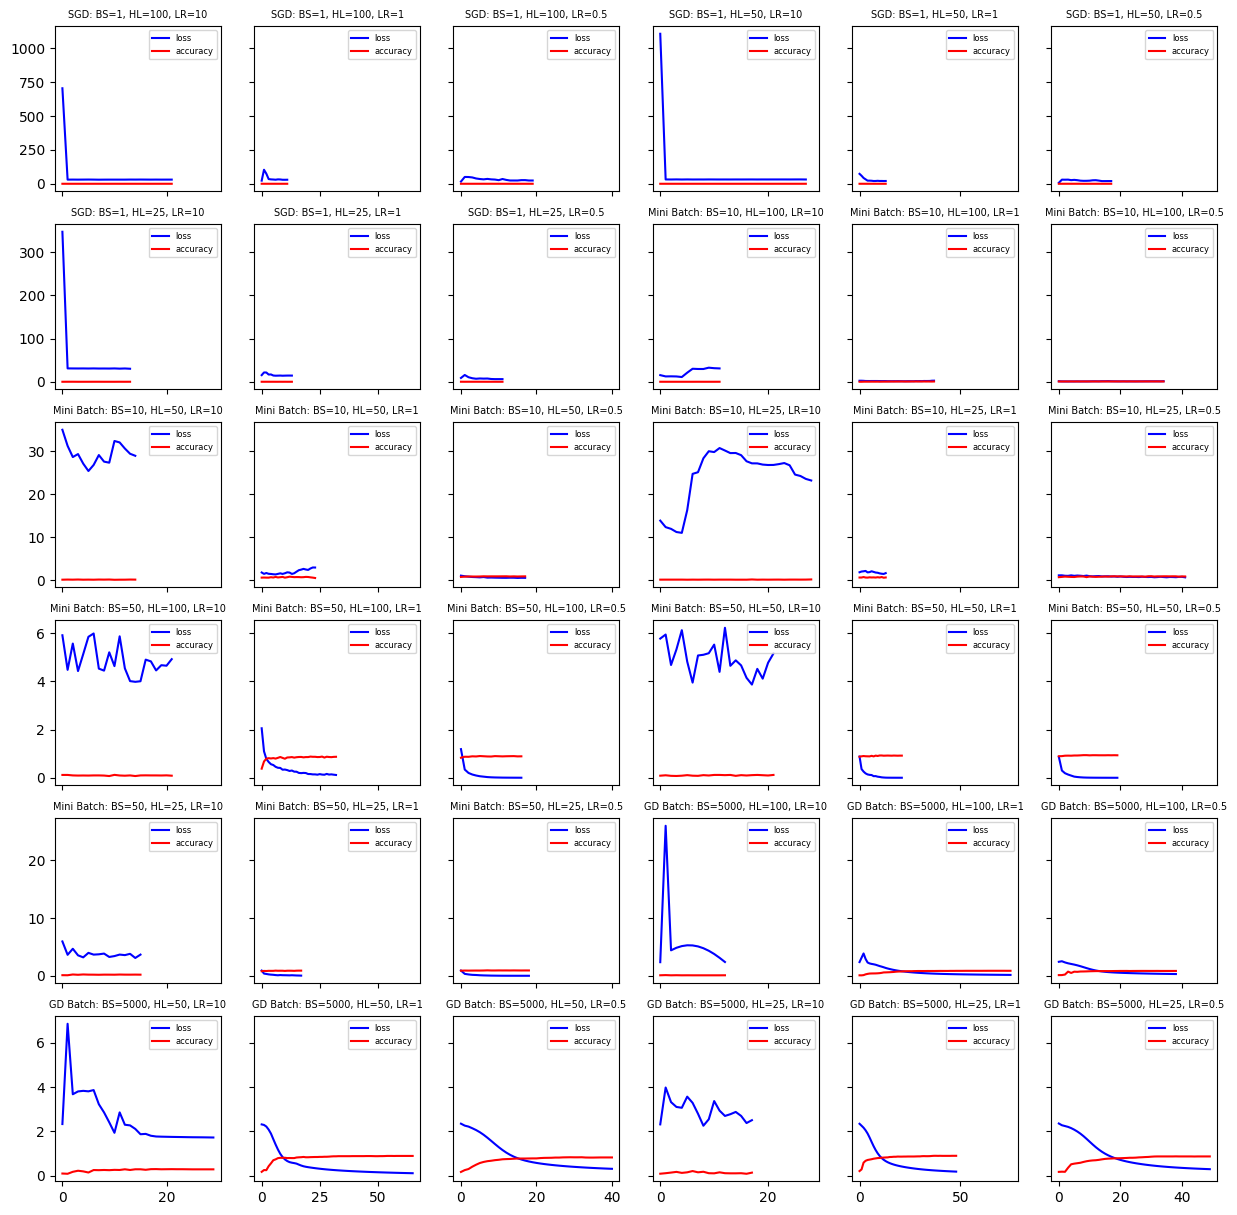

In [ ]:
f, ax = plt.subplots(6, 6, figsize=(15, 15), sharex='col', sharey='row')
n_model = 0
for i in range(6):
  for j in range(6):
    ax[i][j].plot(models[n_model][7].loss_curve_, color='b', label='loss')
    ax[i][j].set_title(f'{models[n_model][0]}: BS={models[n_model][1]}, HL={models[n_model][2]}, LR={models[n_model][3]}', fontsize=7)
    ax[i][j].plot(models[n_model][7].validation_scores_, color='r', label='accuracy')
    ax[i][j].legend(loc='upper right', prop={'size': 6})
    n_model = n_model + 1

## Relação entre a acurácia obtida e a taxa de aprendizado nos modelos:

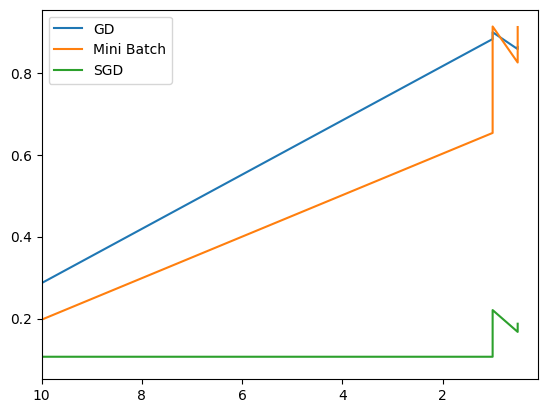

In [ ]:
models_df = models_df.sort_values(['Model', 'Learning Rate', 'Test Accuracy'],
              ascending = [True, False, True])
models_df

plt.plot(models_df[0:8]['Learning Rate'], models_df[0:8]['Test Accuracy'], label = 'GD')
plt.plot(models_df[9:26]['Learning Rate'], models_df[9:26]['Test Accuracy'], label = 'Mini Batch')
plt.plot(models_df[27:35]['Learning Rate'], models_df[27:35]['Test Accuracy'], label = 'SGD')
plt.xlim(max([10.0, 0.1]), min([10.0, 0.1]))
plt.legend()
plt.show()

## Conclusão
Ao avaliar o impacto da abordagem e dos parâmetros utilizados na geração dos classificadores, foi possível fazer as seguintes considerações:

*   Tamanho do Lote: A partir desse parâmetro foi possível definir qual o tipo de Descida de gradiente o modelo teria. Ficou claro que para o conjunto de dados fornecido, o Stochastic Gradient Descent não obteve bons resultados em termos de acurácia. Uma hipótese para o seu desempenho, seria o baixo volume de amostras. Em relação ao Mini Batch, a medida que foram fornecidos lotes maiores, o desempenho do modelo melhorou, sendo os lotes de tamanho 50, os com maior acurácia entre todas as abordagens. O uso do Gradient Descent, também apresentou boa acurácia.
*   Numero de Camadas Ocultas: O numero de camadas ocultas, foi fator de influência para os modelos com baixo aprendizado. sendo que os que possuíam maior quantidade de camadas, os mais bem sucedidos.
*   Taxa de Aprendizado: Os modelos que utilizaram da taxa de aprendizado fixada em 1 ou 0.5, obtiveram bom desempenho. A taxa mais alta utilizada foi 10 e resultou em modelos de baixo desempenho para esse conjunto.